In [35]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import auc
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,confusion_matrix,roc_curve,roc_auc_score
from sklearn.metrics import accuracy_score,log_loss
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn.model_selection import RandomizedSearchCV

In [36]:
joined_data = pd.read_pickle('./joined_data.pkl')

In [23]:
joined_data.head()
aaa = joined_data.loc[joined_data.Capacity.isnull()]
aaa.home_team

Series([], Name: home_team, dtype: object)

In [24]:
pd.options.display.max_rows = 4000
pd.set_option('display.max_columns', None)
joined_data.head()

,home-away-indicator,opponent,win-loss-tie,runs,runs_allowed,innings,record,rank,gb,win,loss,save,time,day_night,attendance,cLI,streak,year,home_team,day,month,num-date,multi-game,wins,losses,Name,Capacity,Location,Surface,Team,Opened,dist_to_center_field_feet,type,roof_type
0,@,FLA,W,7,2,,1-0,2,0.5,Santana,Hendrickson,,2:53,D,38308.0,1.05,1,2008,NYM,Monday,Mar,31,None,1,0,Citi Field,41922,"Queens, New York",Grass,New York Mets,2009,408,Retro-classic,Open
1,@,FLA,L-wo,4,5,10,1-1,2,1.0,Miller,Wise,,3:31,N,15117.0,1.16,-1,2008,NYM,Tuesday,Apr,1,None,1,1,Citi Field,41922,"Queens, New York",Grass,New York Mets,2009,408,Retro-classic,Open
2,@,FLA,W,13,0,,2-1,2,1.0,Perez,Miller,,2:55,N,13720.0,1.10,1,2008,NYM,Wednesday,Apr,2,None,2,1,Citi Field,41922,"Queens, New York",Grass,New York Mets,2009,408,Retro-classic,Open
3,@,ATL,L,5,11,,2-2,2,0.5,Hudson,Maine,,3:27,D,36130.0,1.11,-1,2008,NYM,Saturday,Apr,5,None,2,2,Citi Field,41922,"Queens, New York",Grass,New York Mets,2009,408,Retro-classic,Open
4,@,ATL,L,1,3,,2-3,3,0.5,Smoltz,Santana,Soriano,2:35,D,39414.0,1.11,-2,2008,NYM,Sunday,Apr,6,None,2,3,Citi Field,41922,"Queens, New York",Grass,New York Mets,2009,408,Retro-classic,Open


In [25]:
joined_data = joined_data.sort_values(["year", "month", "num-date"], ascending = (True, True, True))

In [26]:
one_hot_columns = ['roof_type', 'type', 'Surface', 'day_night', 'month', 'day', 'opponent', 'home_team']
#one_hot_columns = ['roof_type', 'type', 'Surface', 'day_night', 'month', 'day']
joined_data = pd.get_dummies(joined_data,columns=one_hot_columns)


In [27]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57663 entries, 1 to 55700
Columns: 115 entries, home-away-indicator to home_team_WSN
dtypes: float64(1), int64(4), object(21), uint8(89)
memory usage: 16.8+ MB


### Convert the labels to encoded state

label_enc = LabelEncoder()
joined_data.roof_type = label_enc.fit_transform(joined_data.roof_type)
joined_data.type      = label_enc.fit_transform(joined_data.type)
joined_data.Surface   = label_enc.fit_transform(joined_data.Surface)
joined_data.day_night = label_enc.fit_transform(joined_data.day_night)
joined_data.opponent  = label_enc.fit_transform(joined_data.opponent)
joined_data.Name = label_enc.fit_transform(joined_data.Name)
joined_data.home_team = label_enc.fit_transform(joined_data.home_team)
joined_data.day = label_enc.fit_transform(joined_data.day)
joined_data.month = label_enc.fit_transform(joined_data.month)

In [38]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57663 entries, 0 to 57662
Data columns (total 34 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   home-away-indicator        57663 non-null  object 
 1   opponent                   57663 non-null  object 
 2   win-loss-tie               57663 non-null  object 
 3   runs                       57663 non-null  object 
 4   runs_allowed               57663 non-null  object 
 5   innings                    57663 non-null  object 
 6   record                     57663 non-null  object 
 7   rank                       57663 non-null  object 
 8   gb                         57663 non-null  object 
 9   win                        57663 non-null  object 
 10  loss                       57663 non-null  object 
 11  save                       57663 non-null  object 
 12  time                       57663 non-null  object 
 13  day_night                  57663 non-null  obj

In [28]:
joined_data.loc[0]

home-away-indicator                         @
win-loss-tie                                W
runs                                        7
runs_allowed                                2
innings                                      
record                                    1-0
rank                                        2
gb                                        0.5
win                                   Santana
loss                              Hendrickson
save                                         
time                                     2:53
attendance                              38308
cLI                                      1.05
streak                                      1
year                                     2008
num-date                                   31
multi-game                               None
wins                                        1
losses                                      0
Name                               Citi Field
Capacity                          

In [29]:
joined_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57663 entries, 1 to 55700
Columns: 115 entries, home-away-indicator to home_team_WSN
dtypes: float64(1), int64(4), object(21), uint8(89)
memory usage: 19.3+ MB


In [30]:
joined_data.Capacity.isnull().sum()
joined_data.loc[joined_data.Capacity.isnull()]

,home-away-indicator,win-loss-tie,runs,runs_allowed,innings,record,rank,gb,win,loss,save,time,attendance,cLI,streak,year,num-date,multi-game,wins,losses,Name,Capacity,Location,Team,Opened,dist_to_center_field_feet,roof_type_Fixed,roof_type_Open,roof_type_Retractable,type_Contemporary,type_Jewel box,type_Modern,type_Multipurpose,type_Retro-classic,type_Retro-modern,Surface_Artificial turf,Surface_Grass,day_night_D,day_night_N,month_Apr,month_Aug,month_Jul,month_Jun,month_Mar,month_May,month_Oct,month_Sep,day_Friday,day_Monday,day_Saturday,day_Sunday,day_Thursday,day_Tuesday,day_Wednesday,opponent_ARI,opponent_ATL,opponent_BAL,opponent_BOS,opponent_CHC,opponent_CHW,opponent_CIN,opponent_CLE,opponent_COL,opponent_DET,opponent_FLA,opponent_HOU,opponent_KCR,opponent_LAA,opponent_LAD,opponent_MIA,opponent_MIL,opponent_MIN,opponent_NYM,opponent_NYY,opponent_OAK,opponent_PHI,opponent_PIT,opponent_SDP,opponent_SEA,opponent_SFG,opponent_STL,opponent_TBR,opponent_TEX,opponent_TOR,opponent_WSN,home_team_ARI,home_team_ATL,home_team_BAL,home_team_BOS,home_team_CHC,home_team_CHW,home_team_CIN,home_team_CLE,home_team_COL,home_team_DET,home_team_HOU,home_team_KCR,home_team_LAA,home_team_LAD,home_team_MIA,home_team_MIL,home_team_MIN,home_team_NYM,home_team_NYY,home_team_OAK,home_team_PHI,home_team_PIT,home_team_SDP,home_team_SEA,home_team_SFG,home_team_STL,home_team_TBR,home_team_TEX,home_team_TOR,home_team_WSN


In [31]:
#convert the remaining object columns to numeric
joined_data.cLI = joined_data.cLI.astype(str).astype(float)
joined_data.Capacity = joined_data.Capacity.astype(str).astype(int)
joined_data['num-date'] = joined_data['num-date'].astype(str).astype(int)
joined_data['dist_to_center_field_feet'] = joined_data['dist_to_center_field_feet'].astype(str).astype(int)
joined_data['rank'] = joined_data['rank'].astype(str).astype(int)

In [32]:
### Drop Columns We Will Not Use

In [33]:
#df['rank']

In [19]:
df = joined_data
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 57663 entries, 1 to 55700
Columns: 115 entries, home-away-indicator to home_team_WSN
dtypes: float64(2), int32(4), int64(4), object(16), uint8(89)
memory usage: 18.4+ MB


<AxesSubplot:>

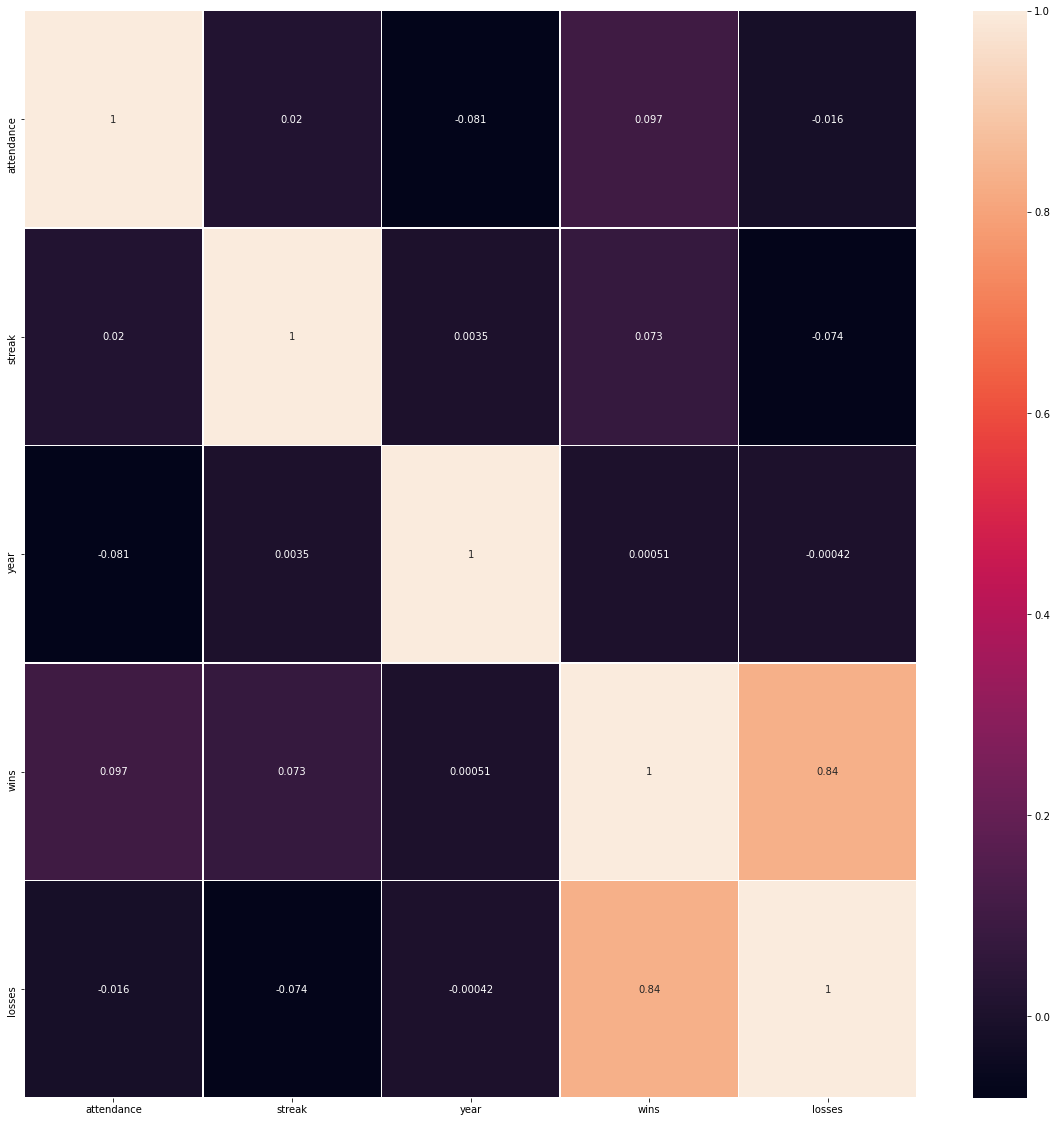

In [37]:
fig, ax = plt.subplots(figsize=(20,20))         # Sample figsize in inches
sns.heatmap(joined_data.corr(), annot=True, linewidths=.5, ax=ax)

In [20]:
df.drop(columns = ['home-away-indicator',
                   'record',
                   'gb',
                   'win-loss-tie', 
                   'runs',
                   'runs_allowed',
                   'innings',
                   'win',
                   'loss',
                   'save',
                   'time',
                   'multi-game',
                   'Location',
                   'Team',
                   'Opened',
                   'Name'], inplace= True)

In [38]:
#Convert the the rank, GB, CLi to INT

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57663 entries, 1 to 55700
Data columns (total 99 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rank                       57663 non-null  int32  
 1   attendance                 57444 non-null  float64
 2   cLI                        57663 non-null  float64
 3   streak                     57663 non-null  int64  
 4   year                       57663 non-null  int64  
 5   num-date                   57663 non-null  int32  
 6   wins                       57663 non-null  int64  
 7   losses                     57663 non-null  int64  
 8   Capacity                   57663 non-null  int32  
 9   dist_to_center_field_feet  57663 non-null  int32  
 10  roof_type_Fixed            57663 non-null  uint8  
 11  roof_type_Open             57663 non-null  uint8  
 12  roof_type_Retractable      57663 non-null  uint8  
 13  type_Contemporary          57663 non-null  uin

In [40]:
df.head()

,rank,attendance,cLI,streak,year,num-date,wins,losses,Capacity,dist_to_center_field_feet,...,home_team_PHI,home_team_PIT,home_team_SDP,home_team_SEA,home_team_SFG,home_team_STL,home_team_TBR,home_team_TEX,home_team_TOR,home_team_WSN
1,2,15117.0,1.16,-1,2008,1,1,1,41922,408,...,0,0,0,0,0,0,0,0,0,0
14899,3,45996.0,0.96,-1,2008,1,0,1,45494,400,...,0,0,0,0,0,1,0,0,0,0
18786,5,44054.0,1.00,-2,2008,1,0,2,41265,391,...,0,0,0,0,1,0,0,0,0,0
20730,1,44054.0,1.09,2,2008,1,2,0,56000,395,...,0,0,0,0,0,0,0,0,0,0
22674,1,20825.0,0.99,2,2008,1,2,0,40209,396,...,0,0,1,0,0,0,0,0,0,0


df = df.sort_values(["year", "month", "num-date"], ascending = (True, True, True))


In [41]:
df.head(40)

,rank,attendance,cLI,streak,year,num-date,wins,losses,Capacity,dist_to_center_field_feet,...,home_team_PHI,home_team_PIT,home_team_SDP,home_team_SEA,home_team_SFG,home_team_STL,home_team_TBR,home_team_TEX,home_team_TOR,home_team_WSN
1,2,15117.0,1.16,-1,2008,1,1,1,41922,408,...,0,0,0,0,0,0,0,0,0,0
14899,3,45996.0,0.96,-1,2008,1,0,1,45494,400,...,0,0,0,0,0,1,0,0,0,0
18786,5,44054.0,1.00,-2,2008,1,0,2,41265,391,...,0,0,0,0,1,0,0,0,0,0
20730,1,44054.0,1.09,2,2008,1,2,0,56000,395,...,0,0,0,0,0,0,0,0,0,0
22674,1,20825.0,0.99,2,2008,1,2,0,40209,396,...,0,0,1,0,0,0,0,0,0,0
24617,3,45996.0,0.97,1,2008,1,1,0,50144,415,...,0,0,0,0,0,0,0,0,0,0
28508,1,36067.0,1.03,1,2008,1,2,1,37755,390,...,0,0,0,0,0,0,0,0,0,0
32395,1,55112.0,1.09,1,2008,1,1,0,46537,408,...,0,0,0,0,0,0,0,0,0,0
34339,4,55112.0,1.09,-1,2008,1,0,1,49286,400,...,0,0,0,0,0,0,0,0,1,0
44055,3,24586.0,1.03,-1,2008,1,1,1,38544,404,...,0,0,0,0,0,0,0,0,0,0


In [42]:
df.to_pickle(("./prepared_data.pkl"))

In [43]:
y = df.attendance
X = df.drop(columns='attendance')

In [44]:
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

In [45]:
df.head()
df.isnull().sum()
df.dropna(subset = ["attendance"], inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57444 entries, 1 to 55700
Data columns (total 99 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rank                       57444 non-null  int32  
 1   attendance                 57444 non-null  float64
 2   cLI                        57444 non-null  float64
 3   streak                     57444 non-null  int64  
 4   year                       57444 non-null  int64  
 5   num-date                   57444 non-null  int32  
 6   wins                       57444 non-null  int64  
 7   losses                     57444 non-null  int64  
 8   Capacity                   57444 non-null  int32  
 9   dist_to_center_field_feet  57444 non-null  int32  
 10  roof_type_Fixed            57444 non-null  uint8  
 11  roof_type_Open             57444 non-null  uint8  
 12  roof_type_Retractable      57444 non-null  uint8  
 13  type_Contemporary          57444 non-null  uin